Let's import some libraries before started!

In [8]:
# used for manipulating directory paths
import os
import pandas as pd
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [9]:
url='https://drive.google.com/uc?export=download&id=1VfCaU5vFVWsSYrvKQF2x9iS6I7KoWEVH'
df = pd.read_csv(url)
df.shape

(11275, 5)

In [10]:
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


<Axes: >

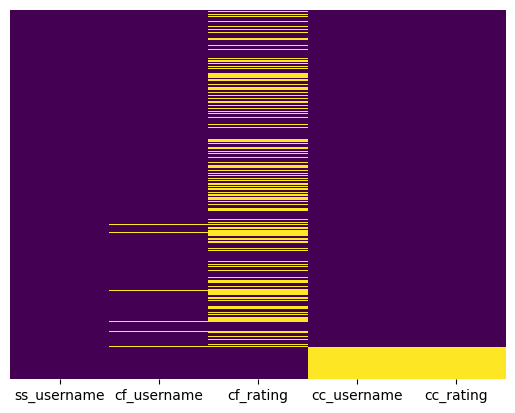

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

looks as if last 10% user have not made their codechef id.
We need to work on the data for which we know both cc_rating and cf_rating so we would drop the empty rows.


In [14]:
df=df.dropna()
df.shape

(6442, 5)

<Axes: >

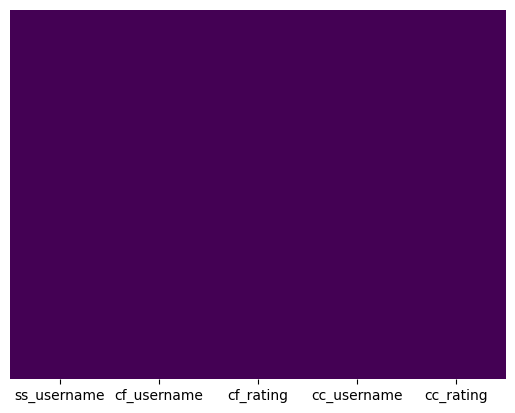

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we can apply Linear Regression model on it.

In [17]:
# collecting x & y
X = df['cc_rating'].values
Y = df['cf_rating'].values

# calculate mean of x & y using an inbuilt numpy method mean()
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [18]:
# total no.of input values
m = len(X)

# using the formula to calculate m & c
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 0.8315620555789317 
c = -32.62926507315501


Now that we’ve our m & c, let’s plot the input points and the regression line.



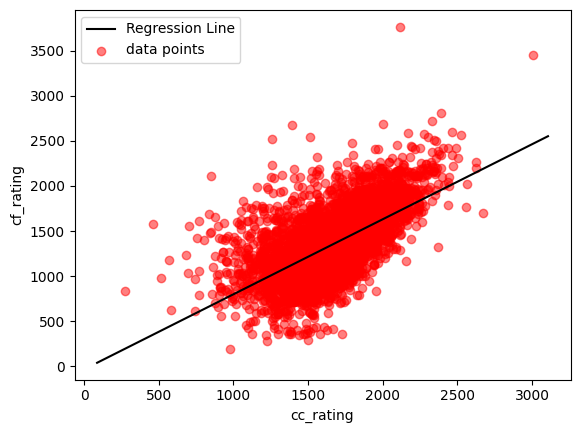

In [26]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(Y) - 100

# calculating line values x and y
x = np.linspace (min_x, max_x, 100)
y = c + m * x

plt.plot(x, y, color='black', label='Regression Line')
plt.scatter(X, Y, c='red', label='data points',alpha=0.5)

plt.xlabel('cc_rating')
plt.ylabel('cf_rating')
plt.legend()
plt.show()

Now it’s time to measure how good our model is. For this we can calculate the R-squared value and evaluate our linear regression model.

In [21]:

# calculating R-squared value for measuring goodness of our model.

ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals

for i in range(6442): # val_count represents the no.of input x values
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

0.39010968543825053
